In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("diabetesdata.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

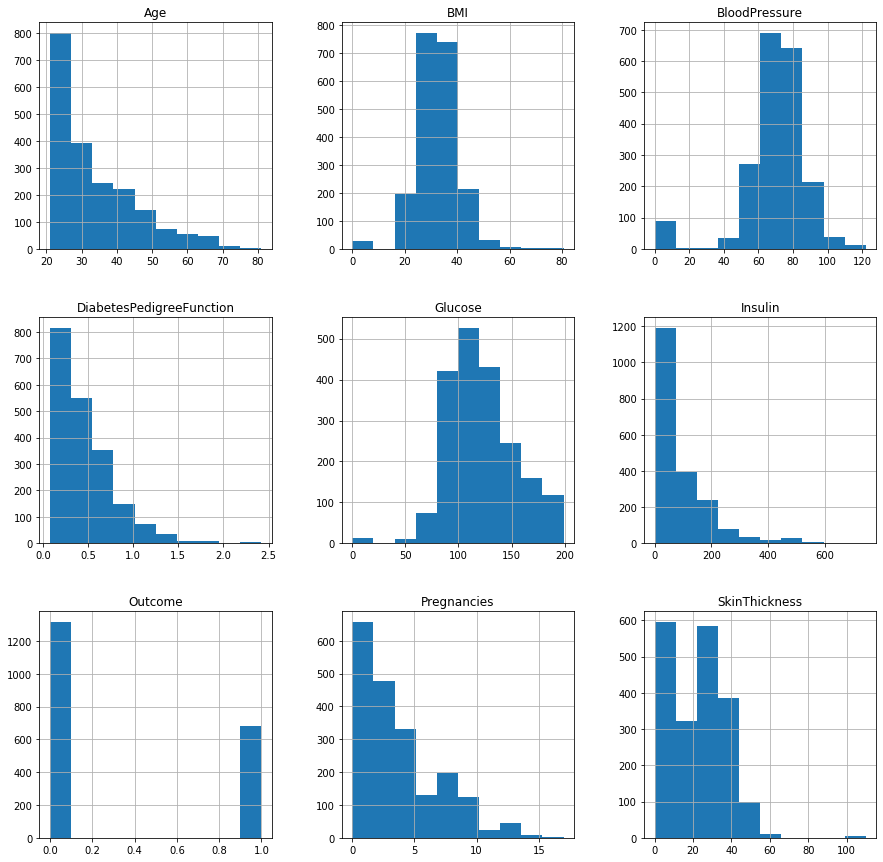

In [7]:
df.hist(figsize = (15,15));

In [8]:
# From domain knowledge we know the values of 'BMI','BloodPressure','SkinThickness','Insulin' and 'Glucose' can't be 0
# Hence there is an error in these data

features = ['BMI','BloodPressure','SkinThickness','Insulin','Glucose']
for feature in features:
    df[feature]=df[feature].replace(0,np.NaN)
df.isnull().sum()


Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
for feature in features:
    df[feature] = df[feature].fillna(df[feature].median())


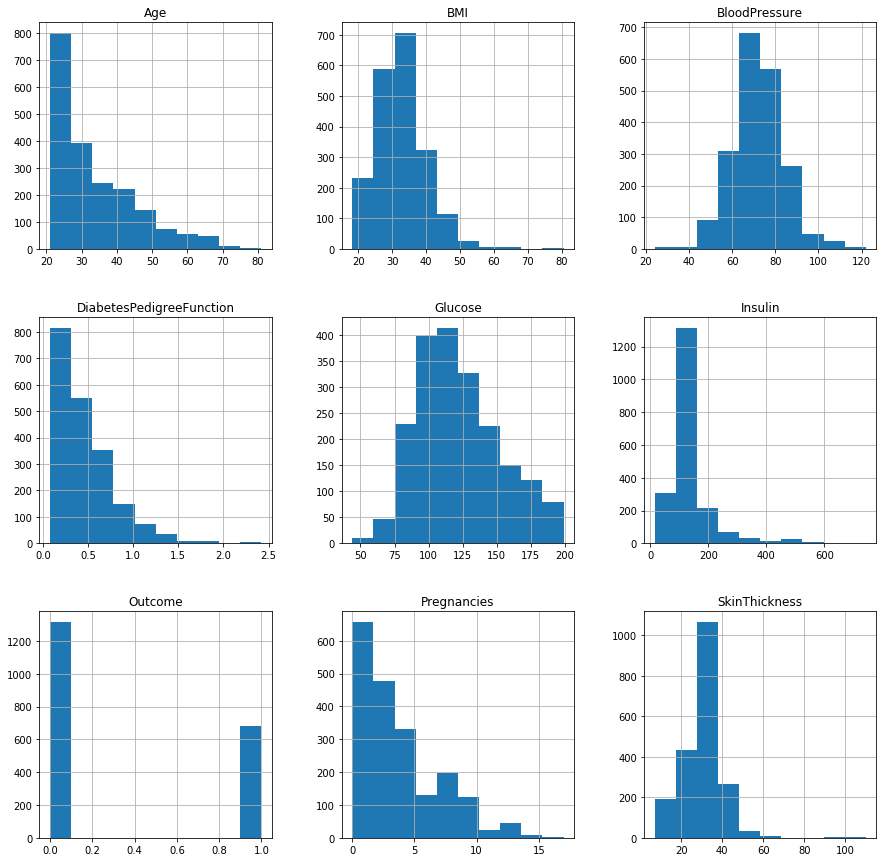

In [10]:
df.hist(figsize = (15,15));

In [11]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [63]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome',axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print('Training set shape: ', X_train.shape)
print('Testing set shape: ', X_test.shape)

Training set shape:  (1600, 8)
Testing set shape:  (400, 8)


In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit,GridSearchCV
from sklearn.svm import SVC

In [26]:
def GridSearch(X, y):
    algo = {
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [20,50,100]
                        }
                    },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
                        }
                    },
        
        'logistic_regression': {
                'parameters': {
                'C': [5,10]
                           },
            'model': LogisticRegression(solver='lbfgs', multi_class='auto')
                        },
            
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [10,20],
                'kernel': ['rbf','linear']
                        }
                }

            }
    
    result = [] 
    shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
        
    for model_name, model_params in algo.items():
        grid = GridSearchCV(model_params['model'], model_params['parameters'], cv = shuffle, return_train_score=False)
        grid.fit(X, y)
        result.append({
            'model': model_name,
            'params': grid.best_params_,
            'score': grid.best_score_
        })
        
    return pd.DataFrame(result, columns=['model','params','score'])

In [27]:
GridSearch(X_train, y_train)

,model,params,score
0,random_forest,{'n_estimators': 50},0.948750
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.897500
2,logistic_regression,{'C': 5},0.758125
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.865625


In [69]:
clf = RandomForestClassifier(n_estimators=50,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

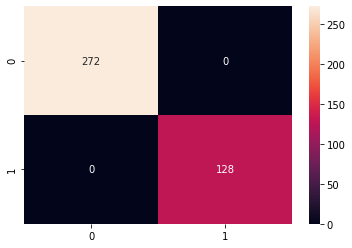

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');


In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=20, random_state=0), X_train, y_train, cv=5)
print('Training accuracy average',(round(sum(scores)*100/len(scores))))

Training accuracy average 95.0


In [72]:
acc = round(accuracy_score(y_test, y_pred),4)*100
print('Test set accuracy', acc)

Test set accuracy 100.0


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       272
           1       1.00      1.00      1.00       128

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [77]:
import pickle

filename = 'diabetes_model.pkl'
pickle.dump(clf, open(filename, 'wb'))